In [3]:

#!pip install "azureml.dataprep"

Press 'H' when focus outside of a cell to get help 

Read https://shortcutworld.com/Jupyter-Notebook/win/Jupyter-Notebook_Shortcuts

Commands

'A' insert cell above
'B' insert cell below
<tab> code completion or indent
<Shift> + <Tab>  tooltip


### Load python modules

In [1]:
from IPython.display import display
from os import path
from tempfile import mkdtemp

import pandas as pd
import azureml.dataprep as dprep

In [3]:
import matplotlib.pyplot as plt

### Load in the csv data using azureml dataprep

In [4]:
ACBI = dprep\
    .read_csv(
        path='Data\Adult Census Income Binary Classification dataset.csv'
    #,     inference_arguments=dprep.InferenceArguments.current_culture()
    )


### Check the type

In [5]:
type(ACBI)

azureml.dataprep.api.dataflow.Dataflow

### check the datatypes that have been imported

In [6]:
ACBI.dtypes

age                      FieldType.STRING
workclass                FieldType.STRING
fnlwgt                   FieldType.STRING
education                FieldType.STRING
education-num            FieldType.STRING
marital-status           FieldType.STRING
occupation               FieldType.STRING
relationship             FieldType.STRING
race                     FieldType.STRING
sex                      FieldType.STRING
capital-gain             FieldType.STRING
capital-loss             FieldType.STRING
hours-per-week           FieldType.STRING
native-country           FieldType.STRING
income                   FieldType.STRING

### Insert a step to convert the age to a numeric

In [7]:
ACBI = ACBI.to_number(['age'])
ACBI = ACBI.to_number(['hours-per-week'])

In [8]:
ACBI.dtypes

age                      FieldType.DECIMAL
workclass                FieldType.STRING
fnlwgt                   FieldType.STRING
education                FieldType.STRING
education-num            FieldType.STRING
marital-status           FieldType.STRING
occupation               FieldType.STRING
relationship             FieldType.STRING
race                     FieldType.STRING
sex                      FieldType.STRING
capital-gain             FieldType.STRING
capital-loss             FieldType.STRING
hours-per-week           FieldType.DECIMAL
native-country           FieldType.STRING
income                   FieldType.STRING

### Sample the data

In [9]:
ACBI.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


### View the steps being used to bring the data into the notebook

In [10]:
ACBI

Dataflow
  steps: [
    Step {
      id: 496a01cd-4fcf-4762-9548-0a65ffa76c75
      type: Microsoft.DPrep.GetFilesBlock,
    },
    Step {
      id: 37dc321d-fbb7-48a4-aafd-e6a3e019da67
      type: Microsoft.DPrep.ParseDelimitedBlock,
    },
    Step {
      id: a252dfe5-da89-430a-99a6-a09ae4b0f2e6
      type: Microsoft.DPrep.DropColumnsBlock,
    },
    Step {
      id: aa0b9143-39fa-4e35-b176-b4a80b52946d
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: e1f38773-50e8-4d45-961e-03ada056bf62
      type: Microsoft.DPrep.ToNumberBlock,
    },
  ]

### We can sample elements of the data 

In [11]:
#Sample the data (5%)
sampled_ACBI = ACBI.take_sample(probability=0.05, seed=5)

In [12]:
sampled_ACBI

Dataflow
  steps: [
    Step {
      id: 496a01cd-4fcf-4762-9548-0a65ffa76c75
      type: Microsoft.DPrep.GetFilesBlock,
    },
    Step {
      id: 37dc321d-fbb7-48a4-aafd-e6a3e019da67
      type: Microsoft.DPrep.ParseDelimitedBlock,
    },
    Step {
      id: a252dfe5-da89-430a-99a6-a09ae4b0f2e6
      type: Microsoft.DPrep.DropColumnsBlock,
    },
    Step {
      id: aa0b9143-39fa-4e35-b176-b4a80b52946d
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: e1f38773-50e8-4d45-961e-03ada056bf62
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: 1092f58f-cdf8-4a51-b6e0-7b6154e95f93
      type: Microsoft.DPrep.TakeSampleBlock,
    },
  ]

### View haw many records we have in the samples data and then view the records

In [13]:
print(ACBI.row_count)
print(sampled_ACBI.row_count)

32561
1575


In [14]:
#View the data profile
sampled_ACBI.to_pandas_dataframe().describe()

,age,hours-per-week
count,1575.000000,1575.000000
mean,38.367619,40.368254
std,13.461464,12.415417
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


## Use the intelligent builder to create a new column based on examples

In [15]:
#Look at the first two columns
sampled_ACBI.head(2)[['age', 'sex']]


,age,sex
0,39.0,Male
1,37.0,Male


In [16]:
#Create a new column 'newcol' based on these values
builder = sampled_ACBI.builders.derive_column_by_example(source_columns=['age', 'sex'], new_column_name='newcol')

builder.add_example(source_data=sampled_ACBI.to_pandas_dataframe().iloc[0], example_value='39 Male')
builder.add_example(source_data=sampled_ACBI.to_pandas_dataframe().iloc[1], example_value='37 Male')

### Make sure the derived column is working

In [17]:
builder.preview() 

,age,sex,newcol
0,39.0,Male,39 Male
1,37.0,Male,37 Male
2,32.0,Male,32 Male
3,35.0,Male,35 Male
4,56.0,Male,56 Male
5,19.0,Female,19 Female
6,53.0,Male,53 Male
7,29.0,Male,29 Male
8,42.0,Male,42 Male
9,53.0,Female,53 Female


### Now lets look at the profile of our sampled data

In [18]:
dataflow = builder.to_dataflow()
dataflow.get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile (est.),1% Quantile (est.),5% Quantile (est.),25% Quantile (est.),50% Quantile (est.),75% Quantile (est.),95% Quantile (est.),99% Quantile (est.),99.9% Quantile (est.),Mean,Standard Deviation,Variance,Skewness,Kurtosis,WhiskerTop,WhiskerBottom
age,FieldType.DECIMAL,17,90,1575.0,0.0,1575.0,0.0,0.0,0.0,66,17,22,22,27.7545,37,47.0212,63.017,73.0625,82.925,38.3676,13.4615,181.211,0.566155,-0.151538,75.3333,17
workclass,FieldType.STRING,?,State-gov,1575.0,0.0,1575.0,0.0,0.0,0.0,7,,,,,,,,,,,,,,,,
fnlwgt,FieldType.STRING,100228,99970,1575.0,0.0,1575.0,0.0,0.0,0.0,>1000,,,,,,,,,,,,,,,,
education,FieldType.STRING,10th,Some-college,1575.0,0.0,1575.0,0.0,0.0,0.0,16,,,,,,,,,,,,,,,,
education-num,FieldType.STRING,1,9,1575.0,0.0,1575.0,0.0,0.0,0.0,16,,,,,,,,,,,,,,,,
marital-status,FieldType.STRING,Divorced,Widowed,1575.0,0.0,1575.0,0.0,0.0,0.0,7,,,,,,,,,,,,,,,,
occupation,FieldType.STRING,?,Transport-moving,1575.0,0.0,1575.0,0.0,0.0,0.0,15,,,,,,,,,,,,,,,,
relationship,FieldType.STRING,Husband,Wife,1575.0,0.0,1575.0,0.0,0.0,0.0,6,,,,,,,,,,,,,,,,
race,FieldType.STRING,Amer-Indian-Eskimo,White,1575.0,0.0,1575.0,0.0,0.0,0.0,5,,,,,,,,,,,,,,,,
sex,FieldType.STRING,Female,Male,1575.0,0.0,1575.0,0.0,0.0,0.0,2,,,,,,,,,,,,,,,,


In [19]:
dataflow

Dataflow
  steps: [
    Step {
      id: 496a01cd-4fcf-4762-9548-0a65ffa76c75
      type: Microsoft.DPrep.GetFilesBlock,
    },
    Step {
      id: 37dc321d-fbb7-48a4-aafd-e6a3e019da67
      type: Microsoft.DPrep.ParseDelimitedBlock,
    },
    Step {
      id: a252dfe5-da89-430a-99a6-a09ae4b0f2e6
      type: Microsoft.DPrep.DropColumnsBlock,
    },
    Step {
      id: aa0b9143-39fa-4e35-b176-b4a80b52946d
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: e1f38773-50e8-4d45-961e-03ada056bf62
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: 1092f58f-cdf8-4a51-b6e0-7b6154e95f93
      type: Microsoft.DPrep.TakeSampleBlock,
    },
    Step {
      id: 22c0c3c8-a264-44cb-8c35-dec380dcbab0
      type: Microsoft.DPrep.DeriveColumnByExample,
    },
  ]

In [20]:
dataflow.to_pandas_dataframe().iloc[:,0].head()

0    39.0
1    37.0
2    32.0
3    35.0
4    56.0
Name: age, dtype: float64

(array([ 82.,  65., 126.,  80., 117.,  86., 120.,  94.,  77., 135.,  80.,
        101.,  54.,  93.,  35.,  45.,  42.,  31.,  41.,  18.,  24.,   5.,
          6.,   7.,   3.,   2.,   4.,   1.,   0.,   1.]),
 array([17.        , 19.43333333, 21.86666667, 24.3       , 26.73333333,
        29.16666667, 31.6       , 34.03333333, 36.46666667, 38.9       ,
        41.33333333, 43.76666667, 46.2       , 48.63333333, 51.06666667,
        53.5       , 55.93333333, 58.36666667, 60.8       , 63.23333333,
        65.66666667, 68.1       , 70.53333333, 72.96666667, 75.4       ,
        77.83333333, 80.26666667, 82.7       , 85.13333333, 87.56666667,
        90.        ]),
 <a list of 30 Patch objects>)

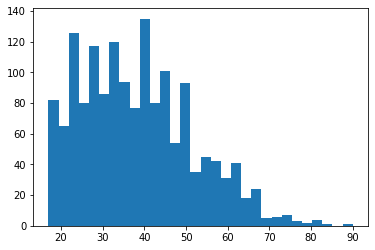

In [21]:
nbins = 30;
plt.hist(dataflow.to_pandas_dataframe().iloc[:,0], nbins)

In [22]:
#Filter data30
dataflow = dataflow.filter(dprep.col('age') < 30)

(array([53., 29., 65., 36., 90., 39., 75., 83.]),
 array([17. , 18.5, 20. , 21.5, 23. , 24.5, 26. , 27.5, 29. ]),
 <a list of 8 Patch objects>)

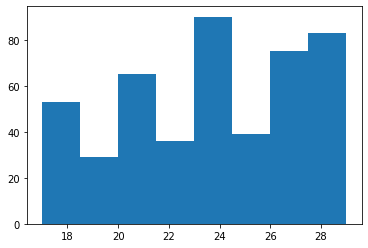

In [23]:
nbins = 8;
plt.hist(dataflow.to_pandas_dataframe().iloc[:,0], nbins)

In [24]:
#See the new step we have added
dataflow

Dataflow
  steps: [
    Step {
      id: 496a01cd-4fcf-4762-9548-0a65ffa76c75
      type: Microsoft.DPrep.GetFilesBlock,
    },
    Step {
      id: 37dc321d-fbb7-48a4-aafd-e6a3e019da67
      type: Microsoft.DPrep.ParseDelimitedBlock,
    },
    Step {
      id: a252dfe5-da89-430a-99a6-a09ae4b0f2e6
      type: Microsoft.DPrep.DropColumnsBlock,
    },
    Step {
      id: aa0b9143-39fa-4e35-b176-b4a80b52946d
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: e1f38773-50e8-4d45-961e-03ada056bf62
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: 1092f58f-cdf8-4a51-b6e0-7b6154e95f93
      type: Microsoft.DPrep.TakeSampleBlock,
    },
    Step {
      id: 22c0c3c8-a264-44cb-8c35-dec380dcbab0
      type: Microsoft.DPrep.DeriveColumnByExample,
    },
    Step {
      id: e3f26f5f-961b-48e5-a144-5f626dfbfc62
      type: Microsoft.DPrep.ExpressionFilterBlock,
    },
  ]

In [26]:
dataflow.to_pandas_dataframe().head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,newcol,capital-gain,capital-loss,hours-per-week,native-country,income
0,19.0,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,19 Female,0,0,25.0,United-States,<=50K
1,29.0,Private,271466,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Male,29 Male,0,0,43.0,United-States,<=50K
2,24.0,Self-emp-not-inc,32921,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,24 Male,0,0,40.0,United-States,<=50K
3,24.0,State-gov,273905,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,24 Male,0,0,50.0,United-States,<=50K
4,27.0,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,27 Male,0,1980,40.0,Philippines,<=50K


In [27]:
#Transform the data to find the average age by income
ACBI_summary = dataflow\
    .summarize(
        summary_columns=[
            dprep\
                .SummaryColumnsValue(
                    column_id='age', 
                    summary_column_name='Age_mean', 
                    summary_function=dprep.SummaryFunction.MEAN
                )
        ],
        group_by_columns=['income']
    )
ACBI_summary.head(5)

,income,Age_mean
0,<=50K,23.241379
1,>50K,26.971429


### Now add the record back to each row in the dataset with the join back command

In [28]:
#Transform the data to find the average age by income
ACBI_summary = dataflow\
    .summarize(
        summary_columns=[
            dprep\
                .SummaryColumnsValue(
                    column_id='age', 
                    summary_column_name='Age_mean', 
                    summary_function=dprep.SummaryFunction.MEAN
                )
        ],
        group_by_columns=['income'],
        join_back=True #join back puts the data back into the dataset
    )
ACBI_summary.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,newcol,capital-gain,capital-loss,hours-per-week,native-country,income,Age_mean
0,19.0,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,19 Female,0,0,25.0,United-States,<=50K,23.241379
1,29.0,Private,271466,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Male,29 Male,0,0,43.0,United-States,<=50K,23.241379
2,24.0,Self-emp-not-inc,32921,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,24 Male,0,0,40.0,United-States,<=50K,23.241379
3,24.0,State-gov,273905,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,24 Male,0,0,50.0,United-States,<=50K,23.241379
4,27.0,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,27 Male,0,1980,40.0,Philippines,<=50K,23.241379
5,29.0,Private,363425,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,29 Male,0,0,40.0,United-States,<=50K,23.241379
6,24.0,Private,354351,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,24 Male,0,0,40.0,United-States,<=50K,23.241379
7,19.0,Private,217039,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,19 Male,0,0,28.0,United-States,<=50K,23.241379
8,21.0,Private,160968,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,21 Male,0,0,40.0,United-States,<=50K,23.241379
9,19.0,?,117201,HS-grad,9,Never-married,?,Own-child,White,Male,19 Male,0,0,30.0,United-States,<=50K,23.241379


### We have ' ?' in the occupations so we need to clear up

In [29]:
tempdf = ACBI_summary.to_pandas_dataframe()
tempdf[tempdf.occupation.str.contains("\?")].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,newcol,capital-gain,capital-loss,hours-per-week,native-country,income,Age_mean
9,19.0,?,117201,HS-grad,9,Never-married,?,Own-child,White,Male,19 Male,0,0,30.0,United-States,<=50K,23.241379
15,26.0,?,211798,HS-grad,9,Separated,?,Unmarried,White,Female,26 Female,0,0,40.0,United-States,<=50K,23.241379
19,17.0,?,103810,12th,8,Never-married,?,Own-child,White,Male,17 Male,0,0,40.0,United-States,<=50K,23.241379
22,18.0,?,346382,11th,7,Never-married,?,Own-child,White,Male,18 Male,0,0,15.0,United-States,<=50K,23.241379
23,22.0,?,217421,Some-college,10,Never-married,?,Own-child,White,Female,22 Female,0,0,30.0,United-States,<=50K,23.241379


In [30]:
ACBI_replaced = ACBI_summary.replace(columns=['occupation'], find=' ?',replace_with='None')
ACBI_replaced.head(15)
#ACBI_replaced = ACBI_summary.replace_na(columns=['occupation'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,newcol,capital-gain,capital-loss,hours-per-week,native-country,income,Age_mean
0,19.0,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,19 Female,0,0,25.0,United-States,<=50K,23.241379
1,29.0,Private,271466,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Male,29 Male,0,0,43.0,United-States,<=50K,23.241379
2,24.0,Self-emp-not-inc,32921,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,24 Male,0,0,40.0,United-States,<=50K,23.241379
3,24.0,State-gov,273905,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,24 Male,0,0,50.0,United-States,<=50K,23.241379
4,27.0,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,27 Male,0,1980,40.0,Philippines,<=50K,23.241379
5,29.0,Private,363425,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,29 Male,0,0,40.0,United-States,<=50K,23.241379
6,24.0,Private,354351,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,24 Male,0,0,40.0,United-States,<=50K,23.241379
7,19.0,Private,217039,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,19 Male,0,0,28.0,United-States,<=50K,23.241379
8,21.0,Private,160968,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,21 Male,0,0,40.0,United-States,<=50K,23.241379
9,19.0,?,117201,HS-grad,9,Never-married,None,Own-child,White,Male,19 Male,0,0,30.0,United-States,<=50K,23.241379


In [31]:
#Look at our pipeline so far
ACBI_replaced

Dataflow
  steps: [
    Step {
      id: c41419d3-9a46-4550-835a-5894f736e668
      type: Microsoft.DPrep.GetFilesBlock,
    },
    Step {
      id: 042b1a1b-2d83-4dba-9019-684f0332c321
      type: Microsoft.DPrep.ParseDelimitedBlock,
    },
    Step {
      id: fc14f0d8-1371-4426-a9fa-dadd8e804971
      type: Microsoft.DPrep.DropColumnsBlock,
    },
    Step {
      id: 4261c10a-9833-4f35-a725-b7e30c35b8fc
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: 3c46923f-2916-419e-923a-acd127befe7d
      type: Microsoft.DPrep.ToNumberBlock,
    },
    Step {
      id: 2a44c7f2-53ad-4d04-986b-72f1c72469eb
      type: Microsoft.DPrep.TakeSampleBlock,
    },
    Step {
      id: f10f5c44-d490-4344-b546-09e3d543b3e4
      type: Microsoft.DPrep.DeriveColumnByExample,
    },
    Step {
      id: 1b9ff319-4639-48f2-b226-9ef0fdf5933e
      type: Microsoft.DPrep.ExpressionFilterBlock,
    },
    Step {
      id: 71f4e2e4-dda4-4dcd-9579-f23f078fa5ed
      type: Microsoft.DPrep.Sum

In [32]:
#assert an error for any values over 60
ACBI_asserted = ACBI_replaced\
    .assert_value(
        columns='age', 
        expression=dprep.f_or(dprep.value.is_null(), dprep.value <= 20),
        error_code='Invalid'
    )
ACBI_asserted.get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile (est.),1% Quantile (est.),5% Quantile (est.),25% Quantile (est.),50% Quantile (est.),75% Quantile (est.),95% Quantile (est.),99% Quantile (est.),99.9% Quantile (est.),Mean,Standard Deviation,Variance,Skewness,Kurtosis,WhiskerTop,WhiskerBottom
age,FieldType.DECIMAL,17,20,470.0,0.0,470.0,0.0,352.0,0.0,5,17,17,17,18,19,20,20,20,20,18.7373,1.02472,1.05005,-0.126278,-1.22674,20,17
workclass,FieldType.STRING,?,State-gov,470.0,0.0,470.0,0.0,0.0,0.0,7,,,,,,,,,,,,,,,,
fnlwgt,FieldType.STRING,102460,99970,470.0,0.0,470.0,0.0,0.0,0.0,457,,,,,,,,,,,,,,,,
education,FieldType.STRING,10th,Some-college,470.0,0.0,470.0,0.0,0.0,0.0,16,,,,,,,,,,,,,,,,
education-num,FieldType.STRING,1,9,470.0,0.0,470.0,0.0,0.0,0.0,16,,,,,,,,,,,,,,,,
marital-status,FieldType.STRING,Divorced,Separated,470.0,0.0,470.0,0.0,0.0,0.0,6,,,,,,,,,,,,,,,,
occupation,FieldType.STRING,Adm-clerical,None,470.0,0.0,470.0,0.0,0.0,0.0,15,,,,,,,,,,,,,,,,
relationship,FieldType.STRING,Husband,Wife,470.0,0.0,470.0,0.0,0.0,0.0,6,,,,,,,,,,,,,,,,
race,FieldType.STRING,Amer-Indian-Eskimo,White,470.0,0.0,470.0,0.0,0.0,0.0,5,,,,,,,,,,,,,,,,
sex,FieldType.STRING,Female,Male,470.0,0.0,470.0,0.0,0.0,0.0,2,,,,,,,,,,,,,,,,


In [33]:
#Find errors
ACBI_errors = ACBI_asserted.filter(dprep.col('age').is_error())
ACBI_errors.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,newcol,capital-gain,capital-loss,hours-per-week,native-country,income,Age_mean
0,"azureml.dataprep.native.DataPrepError(""'Invali...",Private,271466,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Male,29 Male,0,0,43.0,United-States,<=50K,23.241379
1,"azureml.dataprep.native.DataPrepError(""'Invali...",Self-emp-not-inc,32921,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,24 Male,0,0,40.0,United-States,<=50K,23.241379
2,"azureml.dataprep.native.DataPrepError(""'Invali...",State-gov,273905,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,24 Male,0,0,50.0,United-States,<=50K,23.241379
3,"azureml.dataprep.native.DataPrepError(""'Invali...",Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,27 Male,0,1980,40.0,Philippines,<=50K,23.241379
4,"azureml.dataprep.native.DataPrepError(""'Invali...",Private,363425,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,29 Male,0,0,40.0,United-States,<=50K,23.241379


In [34]:
#Save the flow out for reuse
import os
file_path = os.path.join(os.getcwd(), "dflows.dprep")
ACBI_replaced.save(file_path)